# 稀疏连接与平移不变性
稀疏连接 （sparse connectivity）和平移不变性（translation invariance）是卷积神经网络（CNN）中的两个重要概念。
## 稀疏连接
稀疏连接指的是在卷积神经网络中，每个神经元只与输入数据的一个小区域（称为感受野）相连接，而不是与整个输入数据相连接。这种连接方式有以下几个优点：
1. **减少参数数量**：由于每个神经元只连接到输入数据的一小部分，参数数量大大减少，从而降低了计算复杂度和内存需求。
2. **捕捉局部特征**：稀疏连接使得网络能够更有效地捕捉输入数据中的局部特征，例如图像中的边缘、角点等。
3. **提高泛化能力**：通过减少参数数量，稀疏连接有助于防止过拟合，提高模型的泛化能力。
## 平移不变性   
平移不变性指的是卷积神经网络能够识别输入数据中的特征，无论这些特征出现在输入数据的哪个位置。例如，在图像处理中，如果一个物体在图像的不同位置出现，卷积神经网络仍然能够识别出该物体。平移不变性具有以下优点：
1. **位置无关的特征识别**：卷积操作使得网络能够识别输入数据中的特征，而不受其具体位置的影响。
2. **提高鲁棒性**：平移不变性使得模型在面对输入数据的轻微变动时仍能保持良好的性能。
3. **减少训练数据需求**：由于模型能够识别不同位置的特征，减少了对大量位置多样化训练数据的需求。
综上所述，稀疏连接和平移不变性是卷积神经网络中的关键特性，它们共同促进了CNN在图像处理和其他领域的广泛应用。



!![image3.png](mdfiles/image3.png)

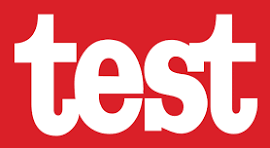

In [2]:
# 读取test.png
import PIL.Image
img = PIL.Image.open("test.png")

display(img)

torch.Size([1, 3, 148, 270])


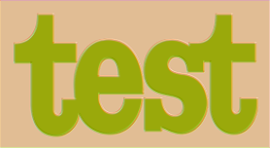

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from PIL import Image

img = Image.open('test.png')

# 3 通道输入，3 通道输出
conv = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)  # 3x3 卷积
img_tensor = torch.tensor(np.array(img)).permute(2, 0, 1).unsqueeze(0).float()  # (1, 3, H, W)

out = conv(img_tensor)  # (1, 3, H, W)
print(out.shape)

# 可视化：归一化到 0-255 转回 PIL
o = out.squeeze(0)                     # (3, H, W)
# 归一化到 0-1
o = (o - o.min()) / (o.max() - o.min() + 1e-8)    # [0,1]
# 从 [0,1] 变成 [0,255] 转成 uint8，符合图片格式 把 (C,H,W) → (H,W,C) 从 torch.Tensor 变成 numpy 数组（PIL 需要 numpy 格式）
o = (o * 255).byte().permute(1, 2, 0).numpy()  # (H, W, 3)
o_img = Image.fromarray(o)
display(o_img)
